# 3.3.1 Grid Search

Grid Search is a systematic method for hyperparameter tuning that builds and evaluates a model for each combination of hyperparameters specified in a grid. It is a brute-force search that exhaustively tries all possible combinations to find the best set of hyperparameters that optimize the model's performance.

### Grid Search Algorithm Steps

1. **Define the Hyperparameter Grid**: Specify a set of possible values for each hyperparameter to be tuned.

2. **Build and Evaluate Models**: For each combination of hyperparameters, build a model and evaluate its performance using cross-validation.

3. **Select the Best Model**: Identify the combination of hyperparameters that results in the best performance according to a specified metric (e.g., accuracy, F1 score).

Grid Search is computationally intensive but ensures that the optimal hyperparameters are found within the specified grid. It is particularly useful when the search space is not too large or when computational resources are sufficient.

### Implementation

We will implement Grid Search to optimize hyperparameters for three different classifiers: Support Vector Machine (SVM), Random Forest and k-Nearest Neighbors (k-NN) on a classification dataset. The hyperparameters to be tuned include the regularization parameter `C` and kernel type (`linear`, `rbf`) for SVM, and the number of trees (`n_estimators`) and maximum depth of the trees (`max_depth`) for Random Forest,and the number of neighbors (`n_neighbors`) and the weight function used in prediction (`weights`) for k-NN.


### Readings:

- [Optimizing Hyperparameters with Grid Search](https://blog.devops.dev/optimizing-hyperparameters-with-grid-search-a-hands-on-tutorial-8dc566881e64)
- [Harnessing the power of Grid Search](https://medium.com/analysts-corner/harnessing-the-power-of-grid-search-for-optimized-machine-learning-models-5878e3abf2d6)
- [Intro and Implementation of Grid Search, Random Search and Bayesian Optimization](https://readmedium.com/en/https:/towardsdatascience.com/hyperparameter-optimization-intro-and-implementation-of-grid-search-random-search-and-bayesian-b2f16c00578a)


<hr><hr>

# 1. Support Vector Classifier 

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic classification data with more decisive separation
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

In [4]:
# Initialize the SVM classifier
svm = SVC()

In [5]:
# Initialize the Grid Search for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')

# Perform Grid Search for SVM
_ = grid_search_svm.fit(X_train, y_train) 

In [6]:
# Best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_
print(f"Best Parameters for SVM: {best_params_svm}")

Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}


In [7]:
# Train the model with the best hyperparameters for SVM
best_svm = grid_search_svm.best_estimator_

# Predict on the test set for SVM
y_pred_svm = best_svm.predict(X_test)

# Evaluate the model for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Set Accuracy: {accuracy_svm}")

SVM Test Set Accuracy: 0.9833333333333333


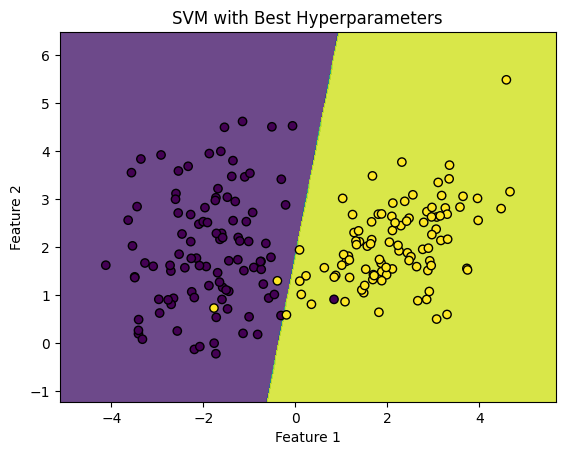

In [8]:
# Visualization of the decision boundary for SVM

# Create a mesh grid for plotting
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary for SVM
Z_svm = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
plt.contourf(xx, yy, Z_svm, alpha=0.8)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('SVM with Best Hyperparameters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<hr><hr>

# 2. Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40]
}

In [11]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [12]:
# Initialize the Grid Search for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Perform Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [13]:
# Best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters for Random Forest: {best_params_rf}")

# Train the model with the best hyperparameters for Random Forest
best_rf = grid_search_rf.best_estimator_

# Predict on the test set for Random Forest
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Set Accuracy: {accuracy_rf}")

Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Random Forest Test Set Accuracy: 0.9666666666666667


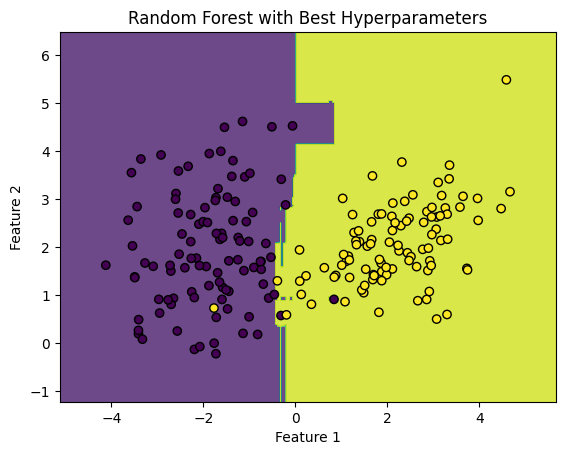

In [14]:
# Visualization of the decision boundary for Random Forest

# Plot decision boundary for Random Forest
Z_rf = best_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rf, alpha=0.8)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Random Forest with Best Hyperparameters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<hr><hr>

# 3. k-Nearest Neighbors (kNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# Define the parameter grid for k-NN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

In [17]:
# Initialize the k-NN classifier
knn = KNeighborsClassifier()

In [18]:
# Initialize the Grid Search for k-NN
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# Perform Grid Search for k-NN
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters for k-NN
best_params_knn = grid_search_knn.best_params_
print(f"Best Parameters for k-NN: {best_params_knn}")

Best Parameters for k-NN: {'n_neighbors': 7, 'weights': 'uniform'}


In [19]:
# Train the model with the best hyperparameters for k-NN
best_knn = grid_search_knn.best_estimator_

# Predict on the test set for k-NN
y_pred_knn = best_knn.predict(X_test)

# Evaluate the model for k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Test Set Accuracy: {accuracy_knn}")

k-NN Test Set Accuracy: 0.9666666666666667


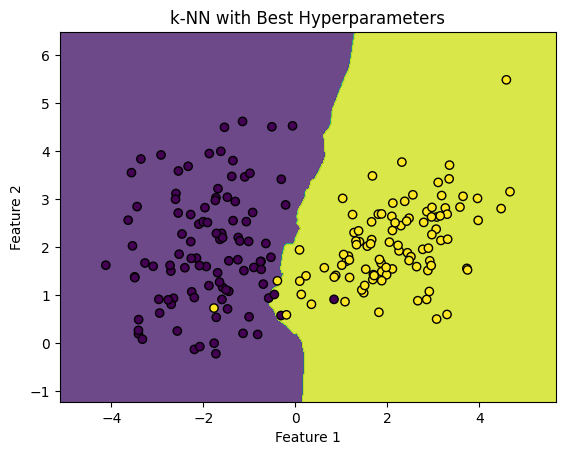

In [20]:
# Visualization of the decision boundary for k-NN

# Plot decision boundary for k-NN
Z_knn = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)
plt.contourf(xx, yy, Z_knn, alpha=0.8)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('k-NN with Best Hyperparameters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Conclusion

Grid Search is a powerful hyperparameter tuning technique that exhaustively searches over a specified parameter grid to find the optimal combination of hyperparameters for a given model. Although computationally intensive, it ensures that the best hyperparameters are identified, leading to improved model performance. In this implementation, Grid Search was applied to optimize the hyperparameters of a Support Vector Machine (SVM), Random Forest and a k-Nearest Neighbors (k-NN) classifier on a classification dataset with clear separation between classes. The results demonstrated the effectiveness of Grid Search in selecting the best model configuration for all classifiers.
